# ACTIVITY 1

Correlated Random Walk

In [28]:
import numpy as np
import matplotlib.pyplot as plt



# from plotly
import plotly.graph_objects as go

from scipy.stats import cauchy
from scipy.stats import levy_stable

In [6]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

In [13]:
def correlated_random_walk_2d(n_steps, correlation_coefficient, initial_angle=0):

    # Initialize arrays for positions, angles, and steps
    positions = np.zeros((n_steps, 2))
    angles = np.zeros(n_steps)
    steps = np.zeros(n_steps)

    # Set the initial angle
    angles[0] = initial_angle
    # Generate initial step size
    steps[0] = np.random.randn()      

    for i in range(1, n_steps):
        # Generate the new step size with some random noise
        steps[i] = correlation_coefficient * steps[i - 1] + np.sqrt(1 - correlation_coefficient**2) * np.random.randn()
        #Rotate the angle with random varia
        random_angle = cauchy.rvs(loc=0,scale=1, size=1, random_state=None)        
        # Generate a new angle based on the previous angle
        angles[i] = correlation_coefficient * angles[i - 1] + np.sqrt(1 - correlation_coefficient**2) * random_angle
        
        # Update to new position
        positions[i, 0] = positions[i - 1, 0] + steps[i] * np.cos(angles[i])
        positions[i, 1] = positions[i - 1, 1] + steps[i] * np.sin(angles[i])

    return positions

# Parameters
n_steps = 10000
correlation_coefficient = 0.9

# Generate and plot the correlated random walk
positions = correlated_random_walk_2d(n_steps, correlation_coefficient)

fig_positions = go.Figure()
fig_positions.add_trace(go.Scatter(x = positions[:,0],
                                   y = positions[:,1],
                                   marker = dict(size=2),
                                   line = dict(width=2),
                                   mode = 'lines',
                                   name = 'cauchy 0.9',
                                   showlegend = True 
                                  ))

fig_positions.show()


## Activity 2 Levy  Stable Distribuition

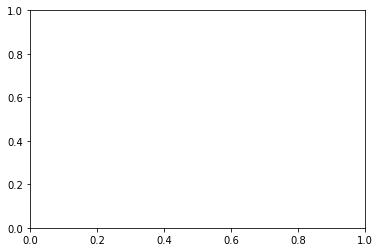

In [48]:
alpha1, alpha2, beta = 1.9, 0.5, 0
mean, var, skew, kurt = levy_stable.stats(alpha, beta, moments='mvsk')

x1 = np.linspace(levy_stable.ppf(0.01, alpha1, beta),
                levy_stable.ppf(0.99, alpha1, beta), 100)

x2 = np.linspace(levy_stable.ppf(0.01, alpha2, beta),
                levy_stable.ppf(0.99, alpha2, beta), 100)

#ax.plot(x1, levy_stable.pdf(x, alpha1, beta),
       #'r-', lw=5, alpha=0.6, label='levy_stable pdf')

#ax.plot(x, levy_stable.pdf(x, alpha2, beta),
       #'r-', lw=5, alpha=0.6, label='levy_stable pdf')


fig = go.Figure()
fig.add_trace(go.Scatter(x = x1,
                         y = levy_stable.pdf(x, alpha1, beta),
                                   marker = dict(size=2),
                                   line = dict(width=2),
                                   mode = 'lines',
                                   name = 'cauchy 0.9',
                                   showlegend = True 
                                  ))

fig.show()
